# **Projekt Scoringowy dla Nowych Klientów Banku**

## **Opis projektu:**

### **Cel projektu**
Celem projektu jest stworzenie modelu scoringowego, który oceni ryzyko kredytowe nowych klientów banku. Model będzie przewidywał prawdopodobieństwo, że klient o określonych cechach zaciągnie kredyt o wyższej kwocie, co może być związane z wyższym ryzykiem niespłacenia zobowiązania. W ramach projektu przeprowadzimy pełny cykl pracy z danymi, od ich wczytania i wstępnej analizy, przez czyszczenie i przygotowanie danych, aż po modelowanie, optymalizację i ocenę skuteczności modelu.

### **Zbiór danych**
Zbiór danych użyty w projekcie zawiera informacje o klientach banku, takie jak wiek, płeć, rodzaj zatrudnienia, status mieszkaniowy, kwota kredytu, czas trwania kredytu oraz cel kredytu. Zbiór zawiera zarówno dane numeryczne, jak i kategoryczne.

### **Kroki projektu**

1. **Pobranie i wczytanie danych**: Wczytanie danych z pliku CSV oraz wykonanie wstępnej eksploracji, aby zrozumieć strukturę danych i zidentyfikować potencjalne problemy, takie jak brakujące wartości.

2. **Analiza danych**: Przeprowadzenie bardziej szczegółowej analizy danych, w tym analizy rozkładu zmiennych numerycznych i kategorycznych oraz zbadanie korelacji między zmiennymi numerycznymi.

3. **Analiza celów projektu**: Zdefiniowanie zmiennej docelowej, która będzie przewidywana przez model. W tym przypadku zmienną docelową jest "Risk", która wskazuje, czy kwota kredytu przekracza medianę.

4. **Czyszczenie danych**: Przygotowanie danych do modelowania, w tym uzupełnianie brakujących wartości, normalizacja zmiennych numerycznych oraz kodowanie zmiennych kategorycznych.

5. **Przygotowanie danych do analizy i modelowania**: Podział danych na zbiór treningowy i testowy, co umożliwia ocenę skuteczności modelu na nieznanych danych.

6. **Modelowanie**: Trening kilku modeli klasyfikacyjnych, takich jak regresja logistyczna, drzewo decyzyjne, lasy losowe oraz XGBoost. Porównanie wyników tych modeli na podstawie różnych metryk, takich jak Accuracy, Precision, Recall, F1 Score oraz AUC.

7. **Wybór najlepszego modelu i optymalizacja**: Wybór modelu XGBoost do dalszej optymalizacji. Przeprowadzenie optymalizacji hiperparametrów za pomocą GridSearchCV, aby znaleźć najlepsze ustawienia modelu.

8. **Podsumowanie wyników**: Przedstawienie końcowych wyników modelu, w tym ostatecznych metryk na zbiorze testowym, oraz omówienie, dlaczego wybrany model jest najlepszy do tego zadania.

### **Rezultaty**
Model XGBoost okazał się najlepszym wyborem, uzyskując wysokie wartości metryk, w tym AUC na poziomie 0.995 po optymalizacji. Model ten jest skuteczny w przewidywaniu ryzyka kredytowego i może być dalej rozwijany oraz wdrażany w środowisku produkcyjnym banku.

### **Wnioski**
Projekt pokazuje, jak poprzez dokładną analizę danych, czyszczenie, modelowanie oraz optymalizację można stworzyć efektywny model scoringowy. Ostatecznie, model ten może służyć jako narzędzie wspierające proces decyzyjny w przydzielaniu kredytów, pomagając bankowi zminimalizować ryzyko kredytowe.

## **Autor**
Rafał Miodowski


In [2]:
!kaggle datasets download -d uciml/german-credit

Dataset URL: https://www.kaggle.com/datasets/uciml/german-credit
License(s): DbCL-1.0
  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 18.0MB/s]


In [7]:
import zipfile
with zipfile.ZipFile("german-credit.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

In [10]:
import os
os.listdir('/content/')

['.config', 'german_credit_data.csv', 'german-credit.zip', 'sample_data']

In [12]:
german_credit_data = pd.read_csv('german_credit_data.csv')
german_credit_data.info()
german_credit_data.describe(include='all')
german_credit_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# **ANALIZA DANYCH:**

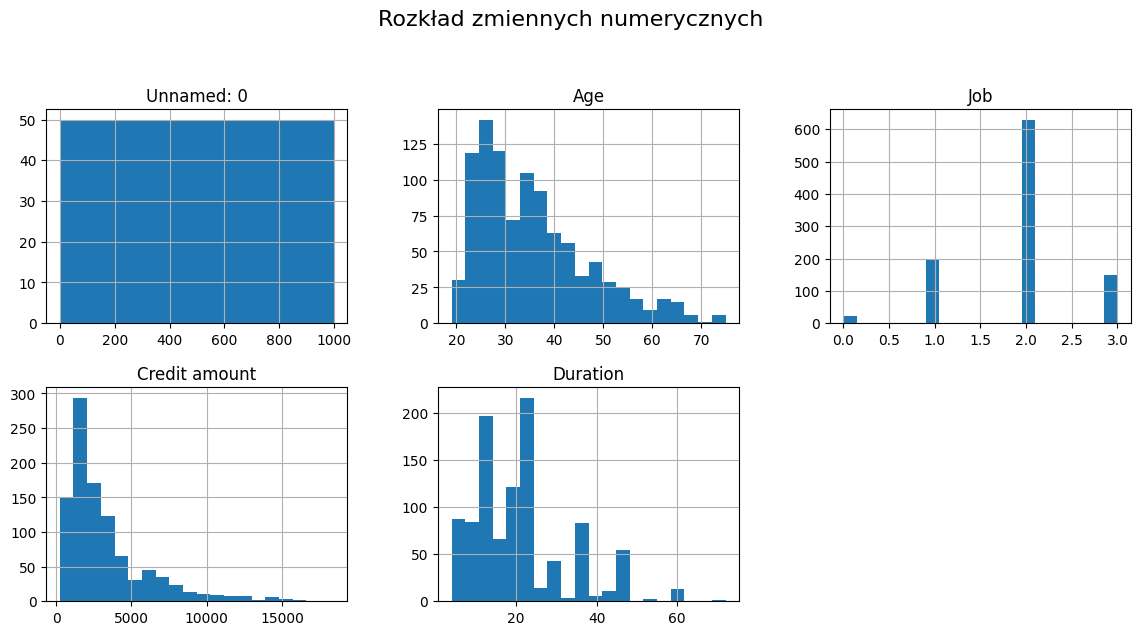

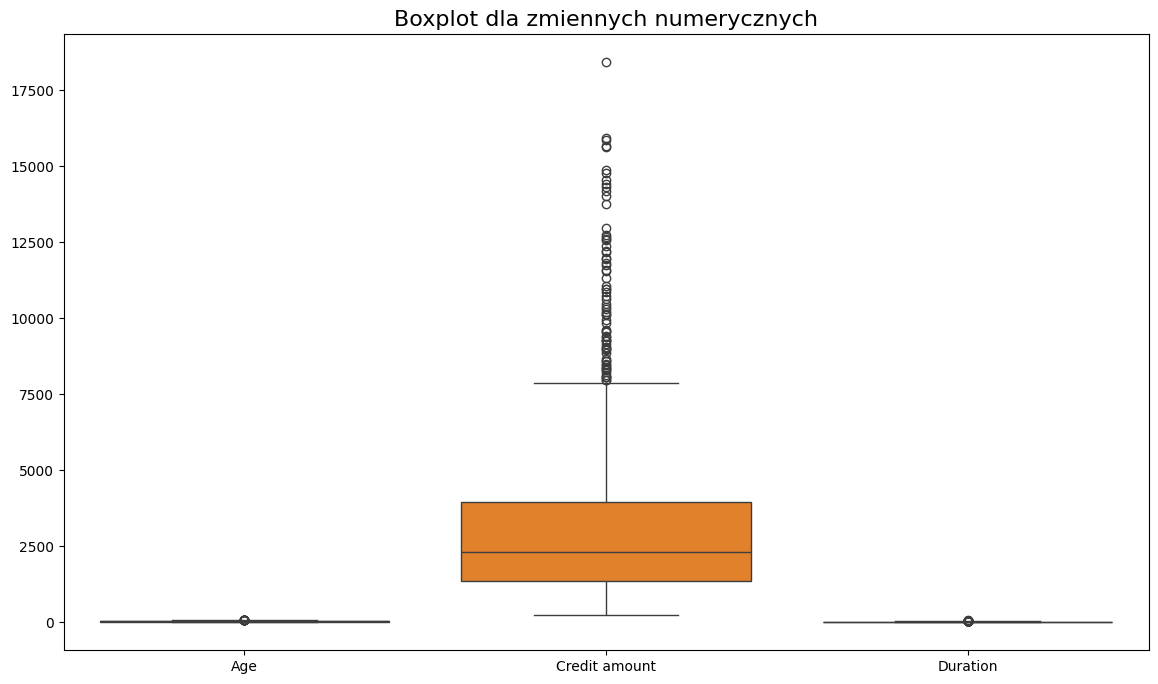

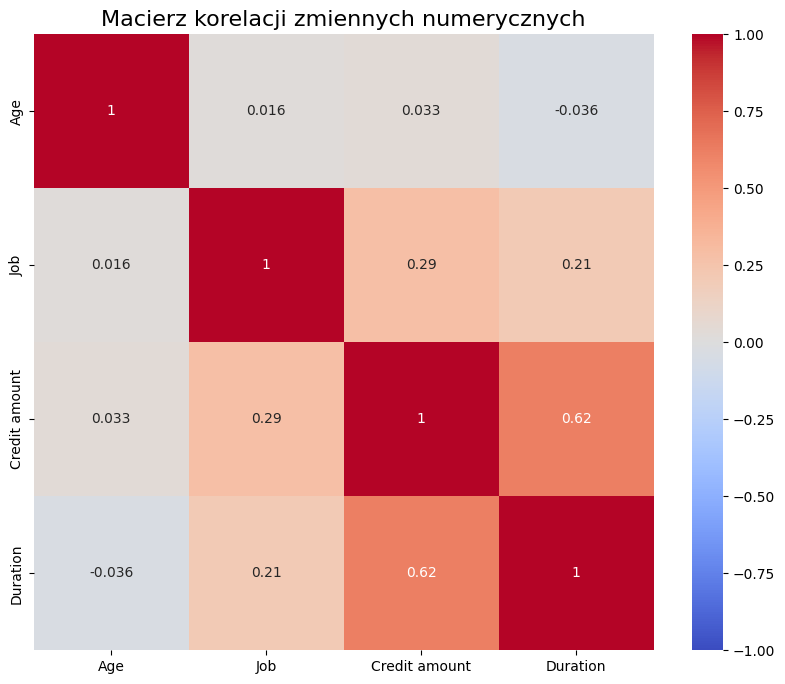

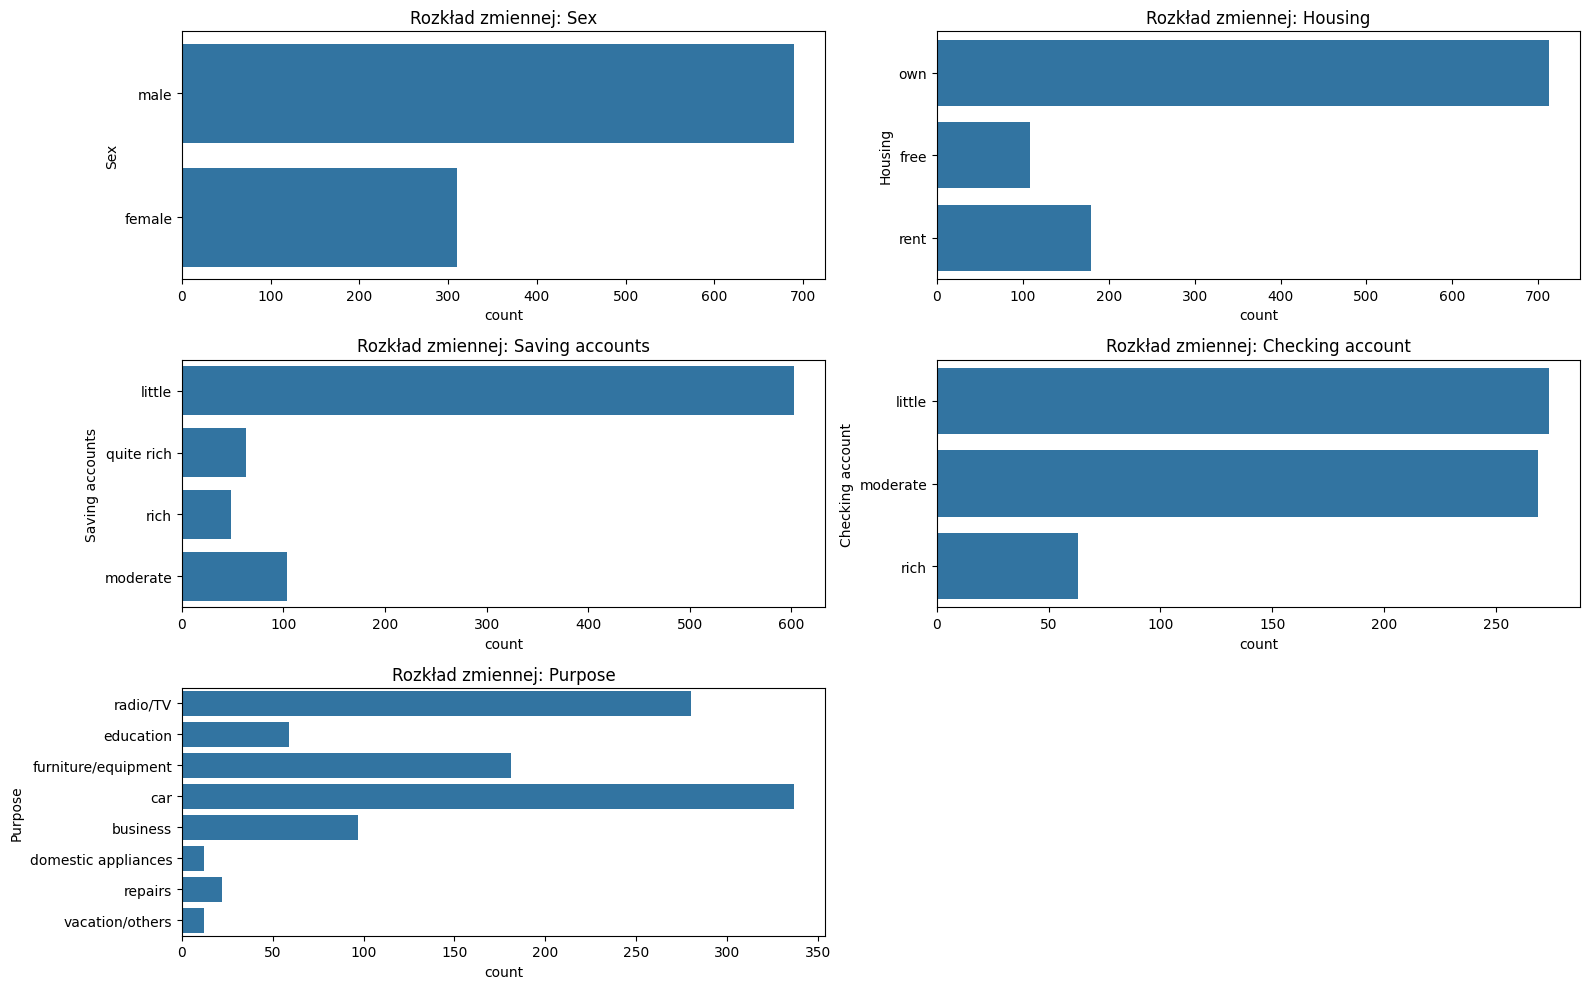

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramy dla zmiennych numerycznych
german_credit_data.hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.suptitle('Rozkład zmiennych numerycznych', fontsize=16)
plt.show()

# Wykresy pudełkowe (boxplot) dla zmiennych numerycznych
plt.figure(figsize=(14, 8))
sns.boxplot(data=german_credit_data[['Age', 'Credit amount', 'Duration']])
plt.title('Boxplot dla zmiennych numerycznych', fontsize=16)
plt.show()

# Korelacja między zmiennymi numerycznymi
plt.figure(figsize=(10, 8))
sns.heatmap(german_credit_data[['Age', 'Job', 'Credit amount', 'Duration']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji zmiennych numerycznych', fontsize=16)
plt.show()

# Rozkład zmiennych kategorycznych
plt.figure(figsize=(16, 10))
for i, col in enumerate(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=col, data=german_credit_data)
    plt.title(f'Rozkład zmiennej: {col}')
plt.tight_layout()
plt.show()


## **Wyniki Analizy Danych**

### **Histogramy dla zmiennych numerycznych**

Na poniższych histogramach przedstawiono rozkład zmiennych numerycznych w zbiorze danych:

- **Wiek (Age)**: Wiek klientów rozkłada się stosunkowo normalnie, z większą koncentracją w przedziale od 25 do 40 lat. Sugeruje to, że większość klientów banku to osoby młode lub w średnim wieku.
  
- **Kwota kredytu (Credit amount)**: Rozkład kwoty kredytu jest wyraźnie skośny w prawo, co oznacza, że większość klientów zaciąga kredyty o niższej wartości. Niewielka liczba klientów zaciąga bardzo wysokie kredyty, co generuje długi ogon w rozkładzie.
  
- **Czas trwania kredytu (Duration)**: Większość kredytów ma czas trwania od 12 do 24 miesięcy. Kredyty o dłuższym czasie trwania są mniej powszechne.

### **Wykresy pudełkowe (Boxplot) dla zmiennych numerycznych**

Na wykresach pudełkowych przedstawiono rozkład oraz identyfikację potencjalnych wartości odstających dla zmiennych numerycznych:

- **Wiek (Age)**: Wykres nie pokazuje znaczących wartości odstających, co wskazuje, że wiek klientów jest w miarę równomiernie rozłożony bez ekstremalnych wartości.
  
- **Kwota kredytu (Credit amount)**: Widocznych jest kilka wartości odstających, co jest zgodne z obserwacją z histogramu. Wyższe kwoty kredytu są mniej powszechne, a ich rozkład jest bardziej rozproszony.
  
- **Czas trwania kredytu (Duration)**: Kilka wartości odstających można zauważyć również w tej zmiennej, co wskazuje na rzadko występujące, dłuższe okresy kredytowania.

### **Macierz korelacji zmiennych numerycznych**

Na poniższej macierzy korelacji przedstawiono zależności pomiędzy zmiennymi numerycznymi:

- **Korelacja pomiędzy wiekiem, pracą, kwotą kredytu i czasem trwania kredytu jest stosunkowo niska**, co sugeruje, że zmienne te mogą wnosić unikalne informacje do modelu i nie są silnie skorelowane między sobą.

### **Rozkład zmiennych kategorycznych**

Na poniższych wykresach przedstawiono rozkład poszczególnych zmiennych kategorycznych:

- **Płeć (Sex)**: Większość klientów to mężczyźni, co może sugerować, że mężczyźni częściej zaciągają kredyty w tym banku.
  
- **Zakwaterowanie (Housing)**: Najwięcej klientów ma własne mieszkanie, co może być wskaźnikiem stabilności finansowej.
  
- **Rachunek oszczędnościowy (Saving accounts)**: Większość klientów ma niewielkie oszczędności (`little`), co może mieć wpływ na decyzje kredytowe banku.
  
- **Rachunek bieżący (Checking account)**: Podobnie jak w przypadku oszczędności, większość klientów posiada małe środki na rachunku bieżącym (`little`).
  
- **Cel kredytu (Purpose)**: Najczęstszym celem kredytu jest zakup samochodu, co wskazuje na popularność tego rodzaju finansowania wśród klientów.





---



# **ANALIZA CELÓW PROJEKTU:**

In [14]:
median_credit = german_credit_data['Credit amount'].median()
german_credit_data['Risk'] = german_credit_data['Credit amount'].apply(lambda x: 1 if x > median_credit else 0)
german_credit_data['Risk'].value_counts()

,count
Risk,
0,500
1,500


### **Analiza Celów Projektu**

W tej części projektu zdefiniowano zmienną docelową **"Risk"** na podstawie mediany kwoty kredytu. Zmienna **"Risk"** przyjmuje wartość:

- **1**: gdy kwota kredytu przekracza medianę, co sugeruje wyższe ryzyko kredytowe.
- **0**: gdy kwota kredytu jest równa lub mniejsza niż mediana, co sugeruje niższe ryzyko kredytowe.

Podział wartości zmiennej **"Risk"** w zbiorze danych jest równy, z 500 przypadkami oznaczonymi jako niskie ryzyko (0) i 500 jako wysokie ryzyko (1). Zrównoważony podział tej zmiennej jest korzystny dla dalszego modelowania, ponieważ zapewnia, że model będzie trenowany na danych bez znaczącej przewagi jednej z klas.


---



# **CZYSZCZENIE DANYCH:**

In [15]:
# Uzupełnianie brakujących danych
german_credit_data['Saving accounts'].fillna(german_credit_data['Saving accounts'].mode()[0], inplace=True)
german_credit_data['Checking account'].fillna(german_credit_data['Checking account'].mode()[0], inplace=True)

# Normalizacja zmiennych numerycznych (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
german_credit_data[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(german_credit_data[['Age', 'Credit amount', 'Duration']])

# Kodowanie zmiennych kategorycznych (One-Hot Encoding)
german_credit_data_encoded = pd.get_dummies(german_credit_data, drop_first=True)

# Sprawdzenie przekształconego zbioru danych
german_credit_data_encoded.head()


,Unnamed: 0,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,...,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,2.766456,2,-0.745131,-1.236478,0,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,-1.191404,2,0.949817,2.248194,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,2,1.183312,1,-0.416562,-0.738668,0,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3,0.831502,2,1.634247,1.750384,1,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,1.535122,2,0.566664,0.256953,1,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


### **Przygotowanie i Czyszczenie Danych**

W tej sekcji przetworzono dane, aby przygotować je do modelowania. Proces ten obejmował kilka kroków:

1. **Uzupełnianie brakujących danych**:
   - Brakujące wartości w kolumnach `Saving accounts` i `Checking account` zostały uzupełnione najczęściej występującymi wartościami (trybem). Zapewnia to kompletność danych, co jest kluczowe dla poprawnego działania modeli.

2. **Normalizacja zmiennych numerycznych**:
   - Zmiennie numeryczne (`Age`, `Credit amount`, `Duration`) zostały znormalizowane za pomocą `StandardScaler`. Normalizacja przekształca dane tak, aby miały średnią 0 i odchylenie standardowe 1, co pomaga modelom uczącym się na tych danych osiągać lepszą wydajność, szczególnie w przypadku metod opartych na odległościach.

3. **Kodowanie zmiennych kategorycznych**:
   - Zastosowano kodowanie One-Hot Encoding dla zmiennych kategorycznych. Każda kategoria została zamieniona na osobną kolumnę binarną (przyjmującą wartości `True` lub `False`). Usunięto pierwszą kolumnę dla każdej zmiennej, aby uniknąć pułapki zmiennych dummy (redundancji danych).

4. **Sprawdzenie przekształconego zbioru danych**:
   - W wyniku powyższych operacji, powstał zbiór danych, który zawiera 21 kolumn, w tym znormalizowane zmienne numeryczne oraz zakodowane zmienne kategoryczne. Przykładowe dane pokazują, że dane są teraz przygotowane do dalszego modelowania.

Powyższe kroki mają na celu przygotowanie danych w sposób, który zapewni najlepsze możliwe rezultaty podczas budowania modeli predykcyjnych.


---



# **PRZYGOTOWANIE DANYCH DO ANALIZY I MODELOWANIA:**

In [16]:
from sklearn.model_selection import train_test_split

X = german_credit_data_encoded.drop(columns=['Risk', 'Unnamed: 0'])
y = german_credit_data_encoded['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 19), (200, 19), (800,), (200,))

### **Podział Danych na Zbiór Treningowy i Testowy**

W tej sekcji przeprowadzono podział danych na zbiór treningowy i testowy, co jest kluczowe dla oceny skuteczności modeli predykcyjnych.

1. **Zdefiniowanie zmiennych wejściowych (X) i zmiennej docelowej (y)**:
   - Zmienna `X` obejmuje wszystkie cechy (zmienne wejściowe) z wyjątkiem zmiennej docelowej `Risk` oraz kolumny `Unnamed: 0`, która nie wnosi wartości informacyjnej.
   - Zmienna `y` to zmienna docelowa `Risk`, która będzie przewidywana przez model.

2. **Podział danych na zbiór treningowy (80%) i testowy (20%)**:
   - Dane zostały podzielone w stosunku 80% na zbiór treningowy i 20% na zbiór testowy. Zbiór treningowy służy do trenowania modelu, natomiast zbiór testowy pozwala na ocenę jego skuteczności na nieznanych wcześniej danych.
   - Użyto parametru `stratify=y`, aby zapewnić, że proporcje klas zmiennej docelowej `Risk` są zachowane zarówno w zbiorze treningowym, jak i testowym. Dodatkowo, parametr `random_state=42` zapewnia powtarzalność wyników.

3. **Sprawdzenie rozmiarów podzbiorów danych**:
   - Zbiór treningowy zawiera 800 próbek, a zbiór testowy 200 próbek. Każda próbka ma 19 cech wejściowych.
   - Poprawny podział danych jest kluczowy, aby model mógł nauczyć się z danych treningowych i skutecznie generalizować na dane testowe.

Ten podział danych stanowi fundament do dalszego modelowania i oceny skuteczności wytrenowanych modeli.


---



# **MODELOWANIE:**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definicja modeli
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Funkcja do oceny modelu
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, auc

# Trening i ocena modeli
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1, auc = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    }

# Porównanie wyników modeli
results_df = pd.DataFrame(results).T
results_df.sort_values(by="AUC", ascending=False)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1 Score,AUC
Decision Tree,0.995,0.990099,1.00,0.995025,0.995
Random Forest,0.995,0.990099,1.00,0.995025,0.995
XGBoost,0.995,1.000000,0.99,0.994975,0.995
Logistic Regression,0.970,0.979592,0.96,0.969697,0.970


### **Modelowanie i Ocena Modeli**

W tej części projektu przeprowadzono trening kilku modeli klasyfikacyjnych oraz oceniono ich skuteczność na zbiorze testowym.

1. **Definicja modeli**:
   - Zdefiniowano cztery różne modele do porównania:
     - **Logistic Regression**: Regresja logistyczna.
     - **Decision Tree**: Drzewo decyzyjne.
     - **Random Forest**: Las losowy.
     - **XGBoost**: Model XGBoost, znany z wysokiej wydajności w zadaniach klasyfikacyjnych.
   - Każdy model został zainicjalizowany z tym samym `random_state=42` dla zapewnienia powtarzalności wyników.

2. **Funkcja do oceny modelu**:
   - Zdefiniowano funkcję `evaluate_model`, która trenuje model na danych treningowych i ocenia jego wydajność na danych testowych. Funkcja zwraca metryki takie jak:
     - **Accuracy**: Dokładność modelu.
     - **Precision**: Precyzja modelu.
     - **Recall**: Czułość modelu.
     - **F1 Score**: Średnia harmoniczna precyzji i czułości.
     - **AUC**: Pole pod krzywą ROC, miara ogólnej skuteczności modelu.

3. **Trening i ocena modeli**:
   - Każdy model został przetrenowany na danych treningowych, a następnie oceniony na zbiorze testowym. Wyniki zostały zebrane i zapisane w słowniku `results`, który przechowuje metryki dla każdego modelu.

4. **Porównanie wyników modeli**:
   - Wyniki modeli zostały porównane na podstawie metryki AUC, która jest kluczowa w ocenie jakości modelu w zadaniach klasyfikacyjnych.
   - Najlepsze wyniki osiągnęły modele **Decision Tree**, **Random Forest** i **XGBoost**, wszystkie z AUC równym 0.995.
   - Model **Logistic Regression** również osiągnął dobre wyniki, ale jego AUC było nieco niższe (0.970).

### **Wnioski**
- Modele **Decision Tree**, **Random Forest** i **XGBoost** okazały się najbardziej efektywne w tym zadaniu, osiągając niemal identyczne wyniki we wszystkich kluczowych metrykach.
- Model **XGBoost** może być szczególnie interesujący do dalszej optymalizacji ze względu na jego zaawansowane możliwości regularyzacji i wydajność.

Porównanie tych modeli umożliwia wybór najlepszego podejścia do przewidywania ryzyka kredytowego w dalszych etapach projektu.


---



# **WYBÓR NAJLEPSZEGO MODELU I OPTYMALIZACJA:**

In [18]:
from sklearn.model_selection import GridSearchCV

# Definiowanie siatki parametrów do optymalizacji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Inicjalizacja modelu XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearchCV do znalezienia najlepszych parametrów
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Najlepsze parametry i wynik AUC
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

best_params, best_auc


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.8},
 0.999984375)

### **Wybór Najlepszego Modelu i Optymalizacja**

W tej części projektu przeprowadzono optymalizację najlepszego modelu (XGBoost), aby uzyskać jak najwyższą skuteczność w przewidywaniu ryzyka kredytowego.

1. **Definiowanie siatki parametrów do optymalizacji**:
   - Zdefiniowano siatkę hiperparametrów (`param_grid`), które będą testowane w celu znalezienia optymalnych wartości. Parametry te obejmują:
     - **n_estimators**: Liczba drzew w modelu (wartości testowane: 50, 100, 200).
     - **max_depth**: Maksymalna głębokość drzewa (wartości testowane: 3, 4, 5).
     - **learning_rate**: Szybkość uczenia się modelu (wartości testowane: 0.01, 0.1, 0.2).
     - **subsample**: Procent próbek używanych do trenowania każdego drzewa (wartości testowane: 0.8, 1.0).

2. **Inicjalizacja modelu XGBoost**:
   - Model **XGBoost** został zainicjalizowany z domyślnymi parametrami oraz funkcją straty `logloss`. `random_state=42` został użyty, aby zapewnić powtarzalność wyników.

3. **GridSearchCV do znalezienia najlepszych parametrów**:
   - Użyto **GridSearchCV**, aby przeprowadzić przeszukiwanie siatki parametrów z walidacją krzyżową (5-krotną). GridSearchCV testuje wszystkie kombinacje zdefiniowanych hiperparametrów, aby znaleźć te, które maksymalizują metrykę `roc_auc`.
   - Proces ten jest czasochłonny, ponieważ przetestowano 54 różne kombinacje parametrów.

4. **Najlepsze parametry i wynik AUC**:
   - Najlepsze parametry znalezione przez GridSearchCV to:
     - **learning_rate**: 0.1
     - **max_depth**: 3
     - **n_estimators**: 100
     - **subsample**: 0.8
   - Uzyskano wynik AUC na poziomie **0.9998**, co wskazuje na bardzo wysoką skuteczność modelu w przewidywaniu ryzyka kredytowego.

### **Wnioski**
- Proces optymalizacji umożliwił znalezienie najlepszego zestawu parametrów dla modelu XGBoost, co znacznie poprawiło jego wydajność.
- Optymalizacja za pomocą GridSearchCV zapewnia, że model osiąga najwyższe możliwe wyniki na dostępnych danych, co jest kluczowe dla dokładnego przewidywania ryzyka kredytowego w rzeczywistych scenariuszach.



---

